In [8]:
import sys
!{sys.executable} pip install --upgrade pip
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.7/Resources/Python.app/Contents/MacOS/Python: can't open file 'pip': [Errno 2] No such file or directory
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement statmodels (from versions: none)
ERROR: No matching distribution found for statmodels


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [177]:
env = pd.read_csv('HW6_PRSA_Data_Tiantan_20130301-20170228.csv')
env.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [131]:
pressure = env[['year','month','day','PRES']].groupby(['year','month','day']).mean()
pressure.head()

PRES
year month day             
2013 3     1    1028.783333
           2    1028.850000
           3    1016.458333
           4    1019.454167
           5    1012.704167

In [132]:
pressure.info

<bound method DataFrame.info of                        PRES
year month day             
2013 3     1    1028.783333
           2    1028.850000
           3    1016.458333
           4    1019.454167
           5    1012.704167
...                     ...
2017 2     24   1021.012500
           25   1018.812500
           26   1020.337500
           27   1017.141667
           28   1014.887500

[1461 rows x 1 columns]>

In [139]:
pressure.describe()

,PRES
count,1461.000000
mean,1012.552346
std,10.064499
min,990.345833
25%,1004.016667
50%,1012.470833
75%,1020.958333
max,1039.945833


In [133]:
def dateMonth(arg):
    year=arg['year']
    month=arg['month']
    day=arg['day']
    return (year+"-"+month+"-"+day)

[]

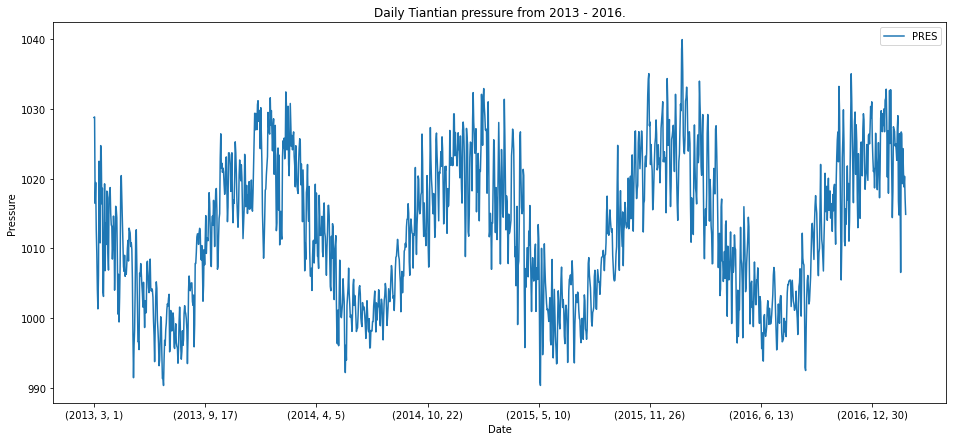

In [6]:
ax = pressure.plot(kind='line', figsize=(16,7), title='Daily Tiantian pressure from 2013 - 2016.')
ax.set_xlabel('Date')
ax.set_ylabel('Pressure');
ax.plot()

## Calculate ACF and PACF

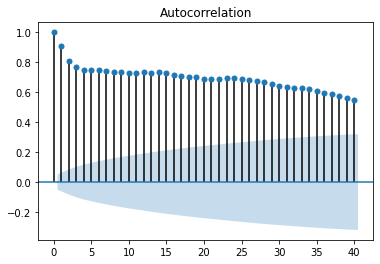

In [30]:
# import sys
# !{sys.executable} -m pip install statsmodels

import statsmodels.api as sm
plot_acf(pressure.values.squeeze(), lags=40)
plt.show()

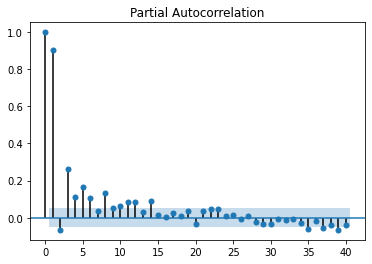

In [31]:
plot_pacf(pressure.values.squeeze(), lags=40)
plt.show()

## Try remove seasonal trend after apply ARIMA

In [41]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(pressure, order=(4,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PRES   No. Observations:                 1460
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -4074.744
Method:                       css-mle   S.D. of innovations              3.942
Date:                Mon, 09 Mar 2020   AIC                           8163.489
Time:                        23:35:09   BIC                           8200.492
Sample:                             1   HQIC                          8177.293
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0018      0.025      0.071      0.944      -0.047       0.050
ar.L1.D.PRES     0.7538      0.032     23.321      0.000       0.690       0.817
ar.L2.D.PRES    -0.3228      0.033     -9.82

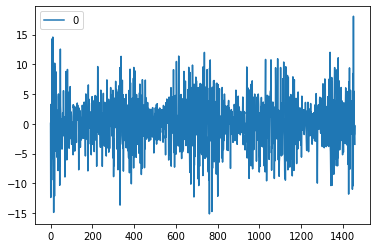

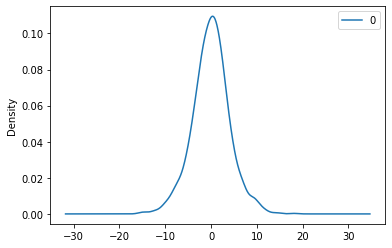

                 0
count  1459.000000
mean     -0.004842
std       4.060934
min     -15.148680
25%      -2.431062
50%       0.034615
75%       2.412035
max      18.072970


In [44]:
from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Test MSE: 16.675


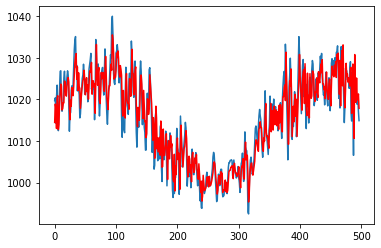

In [49]:
from sklearn.metrics import mean_squared_error

X = pressure.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [217]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(pressure, order=(4,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.PRES   No. Observations:                 1460
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -4116.393
Method:                       css-mle   S.D. of innovations              4.057
Date:                Tue, 10 Mar 2020   AIC                           8244.787
Time:                        12:46:30   BIC                           8276.504
Sample:                             1   HQIC                          8256.619
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0047      0.062     -0.076      0.940      -0.126       0.117
ar.L1.D.PRES    -0.0467      0.026     -1.813      0.070      -0.097       0.004
ar.L2.D.PRES    -0.3439      0.026    -13.42

Test MSE: 17.858


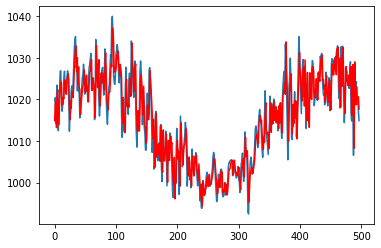

In [218]:
from sklearn.metrics import mean_squared_error

X = pressure.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 18.247


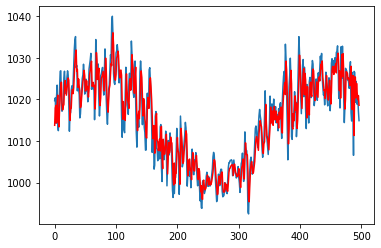

In [47]:
from sklearn.metrics import mean_squared_error

X = pressure.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Try remove seasonal trend before apply ARIMA

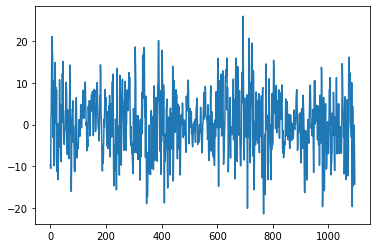

<Figure size 1440x720 with 0 Axes>

1096

In [190]:
X = pressure.values
diff = list()
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - 365]
	diff.append(value[0])
plt.plot(diff)
plt.figure(figsize=(20,10))
plt.show()
len(diff)


In [ ]:
X = pressure.values
diff_diff = list()
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - 365]
	diff.append(value[0])
plt.plot(diff_diff)
plt.figure(figsize=(20,10))
plt.show()
len(diff_diff)

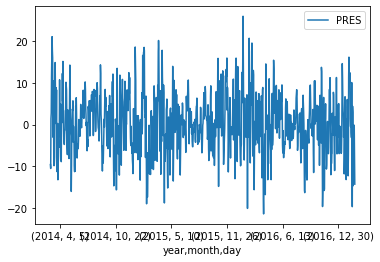

In [188]:
X_diff = pressure.diff(periods=365)
X_diff.plot()

In [191]:
diff

[-9.612499999999727,
 -10.550000000000296,
 1.4250000000000682,
 2.7791666666669244,
 11.612500000000068,
 16.43333333333328,
 21.09166666666681,
 17.791666666666174,
 15.975000000000023,
 -3.0291666666665833,
 -1.745833333333394,
 10.458333333333712,
 -7.324999999999704,
 -9.883333333333098,
 -9.60000000000025,
 -7.81666666666672,
 4.683333333333053,
 14.88333333333344,
 8.008333333333098,
 2.774999999999636,
 8.858333333333235,
 0.19999999999970441,
 8.320833333333212,
 -8.699999999999818,
 -11.308333333333394,
 -3.3541666666666288,
 0.25833333333321207,
 -13.258333333333212,
 -9.391666666666424,
 -7.7000000000000455,
 -3.829166666666538,
 -5.466666666666356,
 -2.125,
 10.733333333333348,
 0.05416666666644687,
 3.308333333332939,
 0.533333333333303,
 4.879166666666606,
 0.04999999999972715,
 -8.912499999999682,
 2.012500000000159,
 0.4375,
 3.4791666666666288,
 12.25416666666672,
 5.600000000000023,
 15.150000000000432,
 6.583333333333712,
 1.0291666666662422,
 -3.5874999999999773,
 

In [113]:
pressure.shape

(1461, 1)

In [150]:
type(diff)

list

In [192]:
diff_pres = pressure.drop(columns=['PRES']).iloc[365:]
diff_pres['diff'] = diff
diff_pres

diff
year month day           
2014 3     1    -9.612500
           2   -10.550000
           3     1.425000
           4     2.779167
           5    11.612500
...                   ...
2017 2     24   -7.308333
           25   -2.900000
           26   -0.158333
           27   -8.875000
           28  -14.308333

[1096 rows x 1 columns]

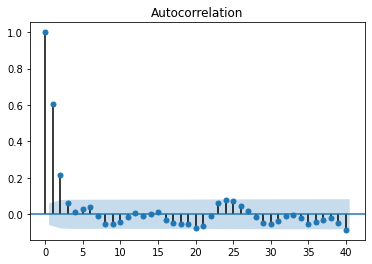

In [193]:
plot_acf(diff_pres.values.squeeze(), lags=40)
plt.show()

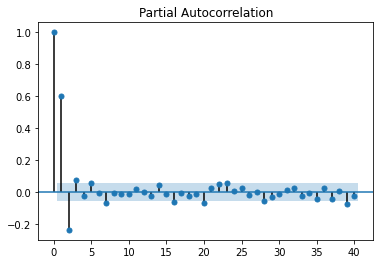

In [194]:
plot_pacf(diff_pres.values.squeeze(), lags=40)
plt.show()

Test MSE: 29.747


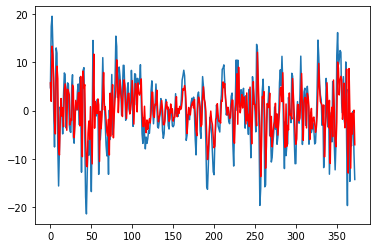

In [198]:
from sklearn.metrics import mean_squared_error

X = diff_pres.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [221]:
model = ARIMA(diff_pres, order=(4,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.diff   No. Observations:                 1095
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -3458.151
Method:                       css-mle   S.D. of innovations              5.692
Date:                Tue, 10 Mar 2020   AIC                           6928.302
Time:                        12:57:46   BIC                           6958.293
Sample:                             1   HQIC                          6939.650
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0050      0.095     -0.052      0.958      -0.191       0.182
ar.L1.D.diff    -0.0850      0.030     -2.870      0.004      -0.143      -0.027
ar.L2.D.diff    -0.3608      0.029    -12.27

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow enc

Test MSE: 29.831


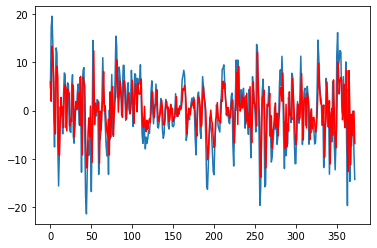

In [200]:
from sklearn.metrics import mean_squared_error

X = diff_pres.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [201]:
from sklearn.metrics import mean_squared_error

X = diff_pres.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,3))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

LinAlgError: SVD did not converge

Test MSE: 29.797


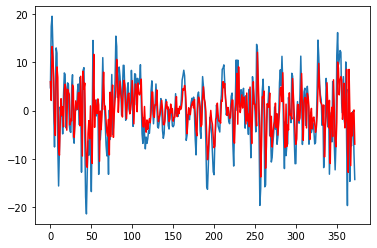

In [202]:
from sklearn.metrics import mean_squared_error

X = diff_pres.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,1))
	model_fit  = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 30.060


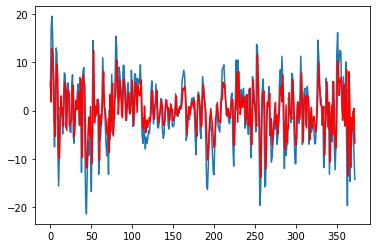

In [203]:
from sklearn.metrics import mean_squared_error

X = diff_pres.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,1))
	model_fit  = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no b

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:548: HessianInversionW

Test MSE: 30.132


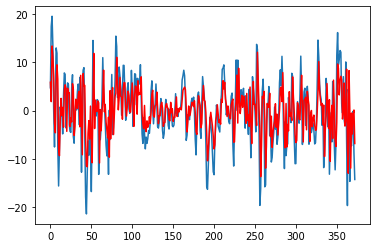

In [204]:
from sklearn.metrics import mean_squared_error

X = diff_pres.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,2))
	model_fit  = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

model = ARIMA(diff_pres, order=(4,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [214]:
model = ARIMA(diff_pres, order=(4,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.diff   No. Observations:                 1095
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -3392.629
Method:                       css-mle   S.D. of innovations              5.347
Date:                Tue, 10 Mar 2020   AIC                           6799.259
Time:                        12:19:25   BIC                           6834.248
Sample:                             1   HQIC                          6812.498
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0011      0.001     -1.015      0.310      -0.003       0.001
ar.L1.D.diff     0.7690      0.030     25.433      0.000       0.710       0.828
ar.L2.D.diff    -0.3011      0.038     -7.91

In [216]:
# Create Training and Test
train = diff_pres[:85]
test = diff_pres[85:]

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/puvitpracharktam/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Length of passed values is 15, index implies 1011.